In [103]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [104]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata (2).xlsx


In [105]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [106]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [108]:
df.shape

(42, 2)

In [109]:
df[df.duplicated()].shape

(0, 2)

In [110]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [111]:
df.set_index('Quarter', inplace=True)
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


<ipython-input-112-5368e380cf99>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})


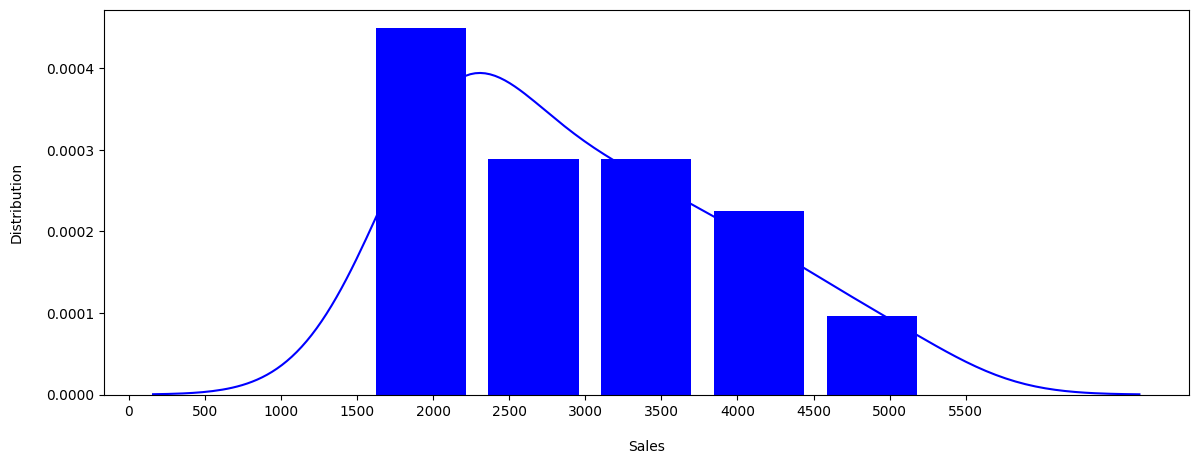

In [112]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,6000,500))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

In [113]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales'], dtype='object')

<ipython-input-114-9491e4da7213>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)


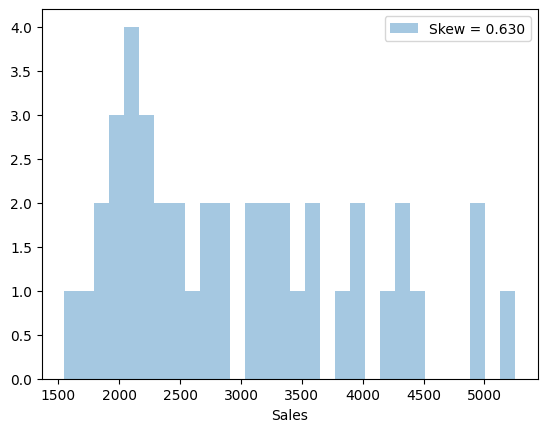

In [114]:
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

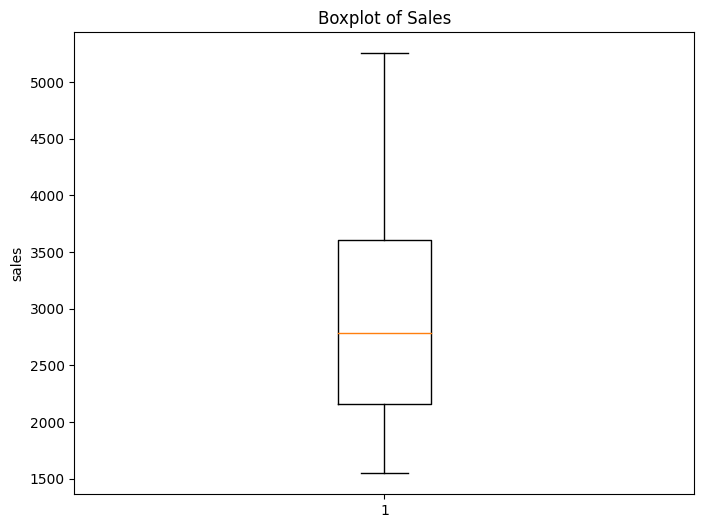

In [115]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('sales')
plt.show()

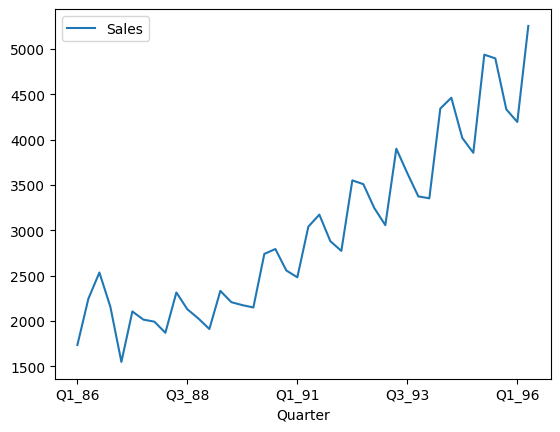

In [116]:
df.plot()
plt.show()

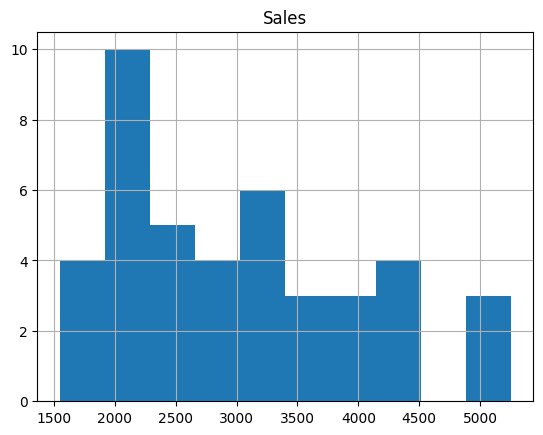

In [117]:
df.hist()
plt.show()

In [118]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [119]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
data.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [120]:
data['Date'] = (pd.to_datetime(data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
data.head()

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [121]:
data['Quarters'] = 0
for i in range(42):
    n = data['Quarter'][i]
    data['Quarters'][i] = n[0:2]
data.head()

<ipython-input-121-003bb5c4e391>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarters'][i] = n[0:2]


,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [122]:
dummy = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat((data, dummy), axis=1)
data.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [123]:
data.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
data.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [124]:
df1 = data.copy()
data.set_index('Date',inplace=True)

In [125]:
data.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

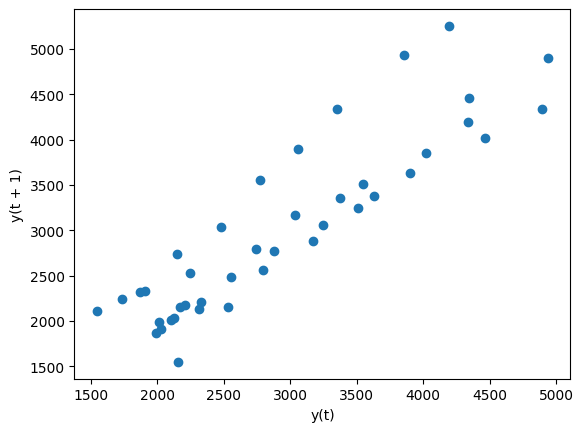

In [126]:
from pandas.plotting import lag_plot
lag_plot(data.Sales)

In [127]:
df1["Date"] = pd.to_datetime(df1.Date,format="%b-%y")
df1["month"] = df1.Date.dt.strftime("%b") # month extraction
df1["year"] = df1.Date.dt.strftime("%Y") # year extraction
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987


<Axes: xlabel='year', ylabel='Sales'>

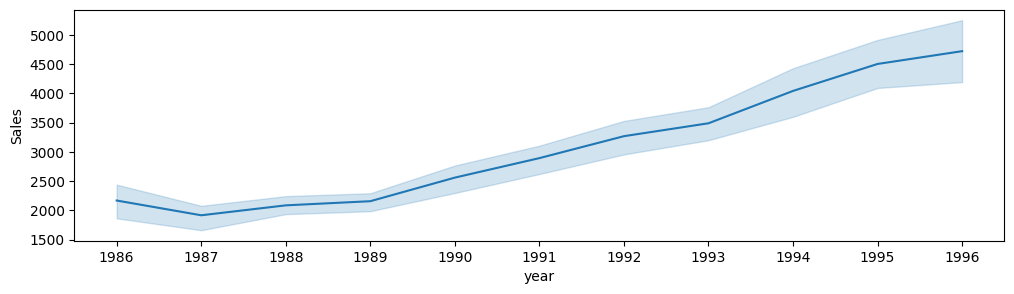

In [128]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=df1)

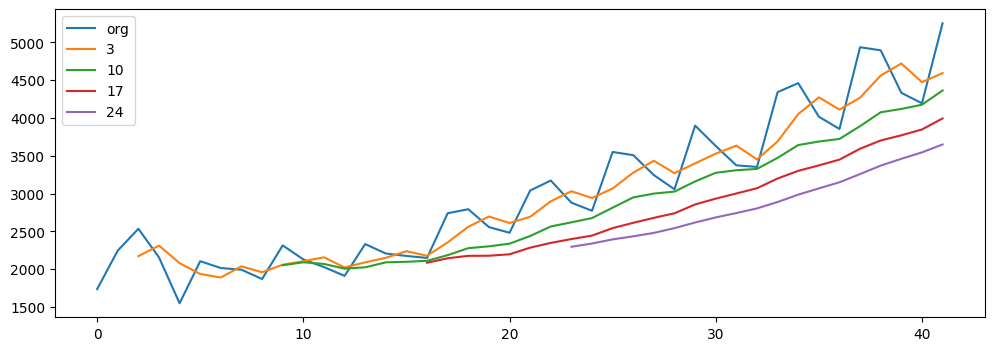

In [129]:
plt.figure(figsize=(12,4))
df1.Sales.plot(label="org")
for i in range(3,30,7):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

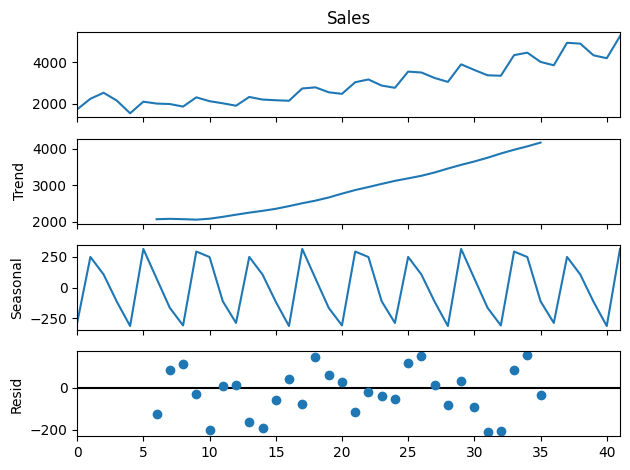

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df1.Sales,period=12)
decompose_ts_add.plot()
plt.show()

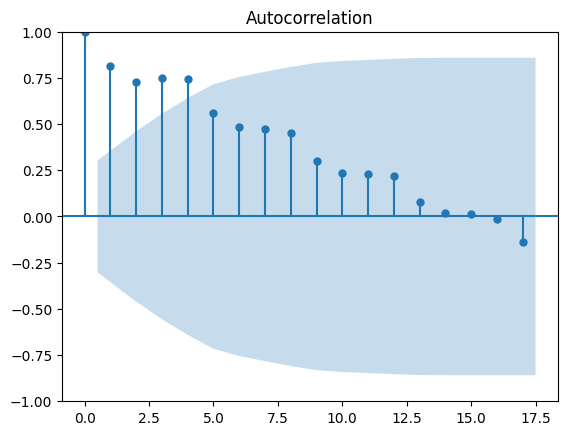

In [131]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df1["Sales"])

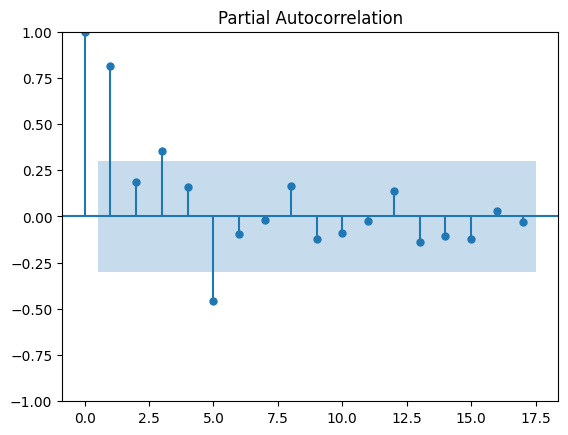

In [132]:
pacf = plot_pacf(df1["Sales"])

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sales     42 non-null     float64       
 1   Date      42 non-null     datetime64[ns]
 2   Quarters  42 non-null     object        
 3   Q1        42 non-null     uint8         
 4   Q2        42 non-null     uint8         
 5   Q3        42 non-null     uint8         
 6   Q4        42 non-null     uint8         
 7   month     42 non-null     object        
 8   year      42 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3), uint8(4)
memory usage: 1.9+ KB


In [134]:
x = np.arange(1,43)

In [135]:
df1['t'] = pd.Series(data=x)
df1['t_sqr'] = pd.Series(data=(x*x))
df1['log_Sales'] = np.log(df1['Sales'])
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,t,t_sqr,log_Sales
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986,1,1,7.458663
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986,2,4,7.716443
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986,3,9,7.837477
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986,4,16,7.675529
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987,5,25,7.344602


In [136]:
Train = df1.head(30)
Test = df1.tail(12)

In [137]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [138]:
data1 = pd.DataFrame()
data1['Date'] = df1['Date']
data1['Sales'] = df1['Sales']
weights = np.array([0.1,0.2,0.3,0.4])
data1['WMA'] = df1['Sales'].rolling(4).apply(lambda x: np.sum(weights*x))
data1.head()

,Date,Sales,WMA
0,1986-01-01,1734.827000,NaN
1,1986-04-01,2244.960999,NaN
2,1986-07-01,2533.804993,NaN
3,1986-10-01,2154.962997,2244.601596
4,1987-01-01,1547.818996,1996.873596


In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

**Simple Exponential Method**

In [140]:
ses_model = SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=1)
pred_ses = ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


12.53674608511905

**Holt Method**

In [141]:
hw_model = Holt(Train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

<ipython-input-141-739e9fd09eec>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


11.247566037445567

**Holts winter exponential smoothing with additive seasonality and additive trend**

In [142]:
hwe_model_add_add = ExponentialSmoothing(Train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.537258097335431

**Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [143]:
hwe_model_mul_add = ExponentialSmoothing(Train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

7.532113536522466

**Final Model by combaining train and test**

In [144]:
hwe_model_add_add = ExponentialSmoothing(data['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [145]:
hwe_model_add_add.forecast(10)

1996-07-01    5056.646890
1996-10-01    4932.026673
1997-01-01    4887.444125
1997-04-01    5552.032558
1997-07-01    5584.776062
1997-10-01    5336.121772
1998-01-01    5235.569369
1998-04-01    5966.721822
1998-07-01    6023.798028
1998-10-01    5755.308218
Freq: QS-OCT, dtype: float64